# Problem Set 2

## Introduction to the assignment

For this assignment, you will be using data from the [Progresa program](http://en.wikipedia.org/wiki/Oportunidades), a government social assistance program in Mexico. This program, as well as the details of its impact, are described in the paper "[School subsidies for the poor: evaluating the Mexican Progresa poverty program](http://www.sciencedirect.com/science/article/pii/S0304387803001858)", by Paul Shultz (available on bCourses). Please familiarize yourself with the PROGRESA program before beginning this problem set, so you have a rough sense of where the data come from and how they were generated. If you just proceed into the problem set without understanding Progresa or the data, it will be very difficult!

The goal of this problem set is to implement some of the basic econometric techniques that you are learning in class to measure the impact of Progresa on secondary school enrollment rates. The timeline of the program was:

 * Baseline survey conducted in 1997
 * Intervention begins in 1998, "Wave 1" of data collected in 1998
 * "Wave 2 of data" collected in 1999
 * Evaluation ends in 2000, at which point the control villages were treated. 
 
When you are ready, download the progresa_sample.csv data from bCourses. The data are actual data collected to evaluate the impact of the Progresa program.  In this file, each row corresponds to an observation taken for a given child for a given year. There are two years of data (1997 and 1998), and just under 40,000 children who are surveyed in each year. For each child-year observation, the following variables are collected:

| Variable name | Description|
|------|------|
|year	  |year in which data is collected
|sex	  |male = 1|
|indig	  |indigenous = 1|
|dist_sec |nearest distance to a secondary school|
|sc	      |enrolled in school in year of survey|
|grc      |grade enrolled|
|fam_n    |family size|
|min_dist |	min distance to an urban center|
|dist_cap |	min distance to the capital|
|poor     |	poor = 1|
|progresa |treatment =1|
|hohedu	  |years of schooling of head of household|
|hohwag	  |monthly wages of head of household|
|welfare_index|	welfare index used to classify poor|
|hohsex	|gender of head of household (male=1)|
|hohage	|age of head of household|
|age	|years old|
|folnum	|individual id|
|village|	village id|
|sc97	|schooling in 1997|

In [1]:
import IPython
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy as sp
import scipy.stats as stats
import sklearn
import matplotlib
import matplotlib.pyplot as plt

---

## Part 1: Descriptive analysis

### 1.1	Summary Statistics

Present summary statistics (mean and standard deviation) for all of the demographic variables in the dataset (i.e., everything except year, folnum, village). Present these in a single table alphabetized by variable name. Do NOT simply expect the grader to scroll through your output!

In [2]:
# your code here

# Import the data set
prg = pd.read_csv('progresa_sample.csv', engine = 'python')

# Drop the missing values (Based on the instructor answer to question@16 on Piazza)
prg = prg.dropna()

# Present the summary statistics table 
prg1 = prg.drop(['year', 'folnum', 'village'], axis = 1)
prg1.describe()['mean':'std'].T.sort_index() # list the variables in alphabetical order
 

,mean,std
age,11.141369,2.995374
dist_cap,148.747707,77.134043
dist_sec,2.346990,2.111281
fam_n,7.224666,2.329421
grc,4.089494,2.447608
grc97,3.762656,2.449568
hohage,44.262224,11.457772
hohedu,2.853908,2.655106
hohsex,0.927744,0.258914
hohwag,592.782484,791.378223


### 1.2 Differences at baseline?

Are the baseline (1997) demographic characteristics **for the poor**  different in treatment and control villages? Hint: Use a T-Test to determine whether there is a statistically significant difference in the average values of each of the variables in the dataset. Focus only on the data from 1997 for individuals who are poor (i.e., poor=='pobre').

Present your results in a single table with the following columns and 14 (or so) rows (alphabetized by variable name):

| Variable name | Average value (Treatment villages) | Average value (Control villages) | Difference (Treat - Control) | p-value |
|------|------|------|------|------|
|Male|?|?|?|?|


In [3]:
# Create two dataframes
base_dic = {'Variable name':[], 'Average value (Treatment villages)':[], 'Average value (Control villages)':[], 'Difference (Treat - Control)':[], 'p-value':[]}
prg2 = prg[(prg['year'] == 97) & (prg['poor'] == 'pobre')]
prg2 = prg2.drop(['year', 'folnum', 'village', 'poor'], axis = 1)
baseline_control = prg2[prg2['progresa'] == str(0)].drop(['progresa'], axis = 1)
baseline_treatment = prg2[prg2['progresa'] == 'basal'].drop(['progresa'], axis = 1)

# Sort the variables in alphabetical order
baseline_control = baseline_control.sort_index(axis=1)
baseline_treatment = baseline_treatment.sort_index(axis=1)

# Calculate the required data for two dataframes
for i in baseline_control:
    base_dic['Variable name'].append(i)
    base_dic['Average value (Control villages)'].append(baseline_control[i].mean())
    
for i in baseline_treatment:
    base_dic['Average value (Treatment villages)'].append(baseline_treatment[i].mean())
    
for i in range(len(base_dic['Variable name'])):
    base_dic['Difference (Treat - Control)'].append(base_dic['Average value (Treatment villages)'][i] - base_dic['Average value (Control villages)'][i])
    base_dic['p-value'].append(sp.stats.ttest_ind(baseline_treatment[base_dic['Variable name'][i]], 
                                                  baseline_control[base_dic['Variable name'][i]], 
                                                  axis = 0, equal_var = True, nan_policy = 'omit')[1])

# Print the results in a single table 
baseline_analyses = pd.DataFrame(base_dic, columns=['Variable name', 'Average value (Treatment villages)', 
                                                    'Average value (Control villages)', 
                                                    'Difference (Treat - Control)', 'p-value'])  
baseline_analyses

,Variable name,Average value (Treatment villages),Average value (Control villages),Difference (Treat - Control),p-value
0,age,10.743825,10.785586,-0.041761,2.476155e-01
1,dist_cap,151.801472,154.492095,-2.690622,3.414194e-03
2,dist_sec,2.399648,2.400687,-0.001039,9.670949e-01
3,fam_n,7.281032,7.302939,-0.021907,4.236088e-01
4,grc,3.709214,3.733653,-0.024439,3.947750e-01
5,grc97,3.709214,3.733653,-0.024439,3.947750e-01
6,hohage,43.631234,44.270717,-0.639483,1.925767e-06
7,hohedu,2.726729,2.660982,0.065747,2.613239e-02
8,hohsex,0.925586,0.923387,0.002199,4.781232e-01
9,hohwag,550.207086,580.694452,-30.487366,2.727661e-04


### 1.3 Interpretation

* A: Are there statistically significant differences between treatment and control villages as baseline? 
* B: Why does it matter if there are differences at baseline?
* C: What does this imply about how to measure the impact of the treatment?

In [4]:
# Check whether there are statistically significant differences at baseline 
baseline_analyses['p-value'] < 0.05

0     False
1      True
2     False
3     False
4     False
5     False
6      True
7      True
8     False
9      True
10    False
11     True
12    False
13    False
14     True
15     True
Name: p-value, dtype: bool

*Discuss your results here*

*A: There are significant differences between treatment and control villages with respect to the following demographic characteristics: dist_cap, hohage, hohedu, hohwag, min_dist, sex, welfare_index. There are not significant differences with respect to other characteristics since their p-values are larger than 0.05.* 

*B: If there are significant differences at baseline, this can be interpreted as evidence that the treatment and control groups are not comparable and hence do not provide a fair basis from which to compare the impact of the treatment. Therefore, testing the baseline differences is important to prove that randomly assigned treatment and control groups are equivalent in the baseline and that there will not be any differences due to randomization.*

*C: If there are significant differences at baseline, this implies that the treatment status is randomly conditioned on the demographic characteristics. However, we can assume that the treatment is randomized across the individuals within each treatment village. Therefore, the impact of the treatment can be measured by taking a weighted average over all villages to observe the average impact of the intervention on the treatment villages. Another idea might be trying to remove the existing differences at baseline for the demographic characteristics listed above. This way we can measure the impact of treatment without any bias.*

### 1.4 Graphical exploration, part 1

For each level of household head education, compute the average enrollment rate in 1997. Create a scatterplot that shows this relationship. What do you notice?

Text(0, 0.5, 'Average enrollment rate in 1997')

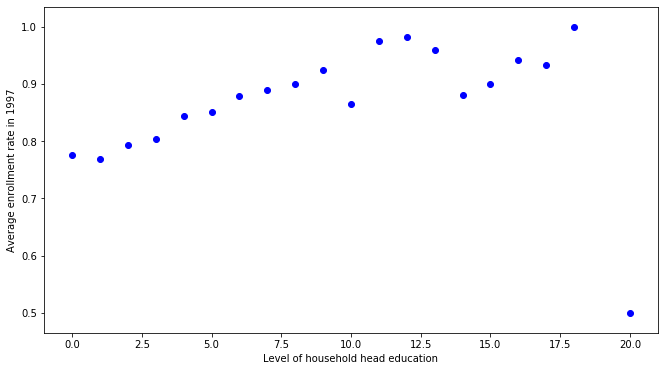

In [5]:
# Your code here

# Compute the average enrollment rates 
enroll = np.zeros(21)
for i in range(21):
        enroll[i] = prg[(prg['hohedu'] == i) & (prg['year'] == 97)]['sc'].mean()

# Create the dataframe 
df1 = pd.DataFrame({'education':np.arange(0,21,1), 'enrollment':enroll})

# Plot the scatterplot
plt.figure(figsize=(11,6))
ax = plt.subplot(111)
plt.scatter(df1.education, df1.enrollment, color = 'blue')
plt.xlabel('Level of household head education')
plt.ylabel('Average enrollment rate in 1997')


*Discuss your results here*

*In general, we can conlude that as the level of household head education increases, the average school enrollment rates at baseline increases. This makes sense because a child is more likely to be enrolled in school (even without an intervention) if the head of the household is more educated and conscious about the value of education. However, we also observe that average enrollment rates slightly drop for household head education years 10 and 13. Lastly, there is an outlier point at year 20 which stands far from the general trend of the plot with an average enrollment rate of almost 50% which is even less than the average rate for households whose head does not have any education at all.*


### 1.5 Graphical exploration, part 2

Visualize the distribution of village enrollment rates **among poor households in treated villages**, before and after treatment. Specifically, for each village, calculate the average rate of enrollment of poor households in treated villages in 1997, then compute the average rate of enrollment of poor households in treated villages in 1998. Create two separate histograms showing the distribution of these average enrollments rates, one histogram for 1997 and one histogram for 1998. On each histogram, draw a vertical line that intersects the x-axis at the average value (across all households). Does there appear to be a difference? Is this difference statistically significant?

Overall average enrollment rate in 1997: 0.8137571244249541
Overall average enrollment rate in 1998: 0.8337415033712263
Ttest_indResult(statistic=-2.5636087966029333, pvalue=0.010587739721624679)


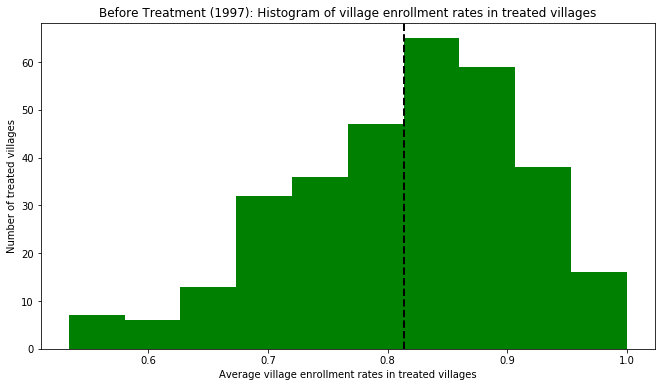

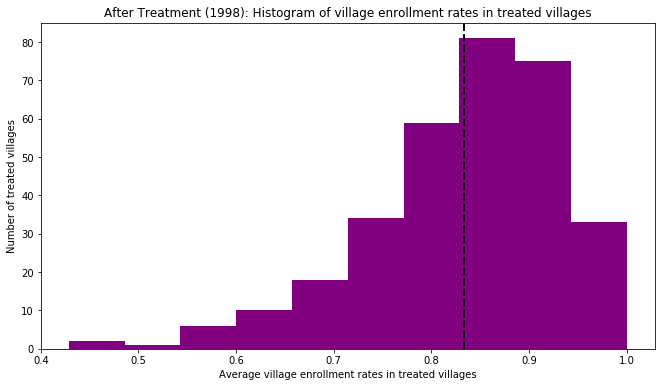

In [6]:
# Your code here

# Compute data for 1997 histogram
av97 = prg[(prg['poor'] =='pobre') & (prg['progresa'] == 'basal') & (prg['year'] == 97)].groupby('village').mean()
x97 = av97['sc'].mean()

# Plot 1997 histogram 
plt.figure(figsize=(11,6))
ax = plt.subplot(111)
plt.hist(av97['sc'], color = 'green', edgecolor = 'none')
plt.ylabel('Number of treated villages')
plt.xlabel('Average village enrollment rates in treated villages')
plt.title('Before Treatment (1997): Histogram of village enrollment rates in treated villages')
plt.axvline(x97, color='black', linestyle='dashed', linewidth=2) # draw the vertical line

# Compute data for 1998 histogram
av98 = prg[(prg['poor'] =='pobre') & (prg['progresa'] == 'basal') & (prg['year'] == 98)].groupby('village').mean()
x98 = av98['sc'].mean()

# Plot 1998 histogram
plt.figure(figsize=(11,6))
ax = plt.subplot(111)
plt.hist(av98['sc'], color = 'purple', edgecolor = 'none')
plt.ylabel('Number of treated villages')
plt.xlabel('Average village enrollment rates in treated villages')
plt.title('After Treatment (1998): Histogram of village enrollment rates in treated villages')
plt.axvline(x98, color='black', linestyle='dashed', linewidth=2) # draw the vertical line 

# Print the results
print('Overall average enrollment rate in 1997:', x97)
print('Overall average enrollment rate in 1998:', x98)
t = stats.ttest_ind(av97['sc'], av98['sc'])
print(t)

*Discuss your results here*

*As can be seen from the histograms, the "after treatment" histogram is more left-skewed than the "before treatment" histogram. This implies that the average village enrollment rates in treatment villages get higher after the treatment. When we look at the overall average village enrollment rates of the poor households in treated villages, the overall average is 0.81375 (almost 81%) in 1997 and 0.83374 (almost 83%) in 1998. This can be also seen from the vertical black lines in the histograms that show the average values among all the poor households in treatment villages. It appears that the overall average village enrollment rate among poor households in treated villages is increased by almost 0.02 (2%) after the treatment. Based on the t-test result, we can conclude that this difference is statistically significant since p-value = 0.0105 < 0.05.*

## Part 2: Measuring Impact

Our goal is to estimate the causal impact of the PROGRESA program on the social and economic outcomes of individuals in Mexico. We will focus on the impact of the program on the poor (those with poor=='pobre'), since only the poor were eligible to receive the PROGRESA assistance.

### 2.1 Simple differences: T-test

Begin by estimating the impact of Progresa using "simple differences." Restricting yourself to data from 1998 (after treatment), calculate the average enrollment rate among **poor** households in the Treatment villages and the average enrollment rate among **poor** households in the control villages. Use a t-test to determine if this difference is statistically significant. What do you conclude?

In [7]:
# Your code here

# Calculate the average enrollment rate among poor households in the treatment villages
outcome_treat = prg[(prg['poor'] =='pobre') & (prg['progresa'] == 'basal') & (prg['year'] == 98)].sc.mean()

# Calculate the average enrollment rate among poor households in the control villages
outcome_control = prg[(prg['poor'] =='pobre') & (prg['progresa'] == str(0)) & (prg['year'] == 98)].sc.mean()

# Apply t-test
tval, pval = sp.stats.ttest_ind(prg[(prg['poor'] =='pobre') & (prg['progresa'] == 'basal') & (prg['year'] == 98)]['sc'], 
                                prg[(prg['poor'] =='pobre') & (prg['progresa'] == str(0)) & (prg['year'] == 98)]['sc'], 
                                axis = 0, equal_var = True, nan_policy = 'omit')

# Print the results
print("Treatment Average: " + str(outcome_treat))
print("Control Average: " + str(outcome_control))
print("Impact (Simple Difference): " + str(outcome_treat - outcome_control))
print("p-value: " + str(pval))
print("t-value: " + str(tval))


Treatment Average: 0.849257030578411
Control Average: 0.810923092511906
Impact (Simple Difference): 0.03833393806650498
p-value: 5.656455605358843e-16
t-value: 8.101650305300375


*Discuss your results here*

*As can be seen, after the treatment, the average enrollment rate among poor households in the treatment villages are higher than that of in the control villages. The simple difference impact of treatment is computed as 0.0383. Since the p-value computed by the t-test is much smaller than 0.05, we can conclude that this difference is statistically significant. In other words, we can conclude that the Progresa treatment had a significant impact on 1998 enrollment rates of poor children in the treatment villages.*

### 2.2 Simple differences: Regression

Estimate the effects of Progresa on enrollment using a regression model, by regressing the 1998 enrollment rates **of the poor** on treatment assignment. For now, do not include any other variables in your regression. Discuss the following:

* Based on this model, how much did Progresa increase or decrease the likelihood of a child enrolling? Make sure you express you answer in a sentence that your grandmother could understand, using appropriate units.
* How does your regression estimate compare to your t-test estimate from part 2.1?
* Based on this regression model, can we reject the null hypothesis that the treatment effects are zero? 
* What is the counterfactual assumption underlying this regression?

In [8]:
## Your code here

reg1 = smf.ols(formula='sc ~ progresa', data=prg[(prg['poor'] =='pobre') & (prg['year'] == 98)], missing = 'drop').fit()
print(reg1.summary())


                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     65.64
Date:                Mon, 10 Feb 2020   Prob (F-statistic):           5.66e-16
Time:                        13:13:25   Log-Likelihood:                -11171.
No. Observations:               26155   AIC:                         2.235e+04
Df Residuals:                   26153   BIC:                         2.236e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.8109      0.00

*Discuss your results here*

- *Based on this model, the average 1998 enrollment rate of non-treated (control) villages is observed as 0.8109, i.e. 81% of the poor children living in the control villages are enrolled in school in 1998. In addition, it is more likely to have 0.0383 unit of increase in the enrollment rate with one unit of increase in treatment. In other words, if a poor household is assigned to be in the Progresa treatment group, then the likelihood of their child's school enrollment increases by 0.0383 (almost 4%). That is the Progresa treatment increases the likelihood of a child enrolling by 0.0383.* 


- *In part 2.1, the treatment impact is computed as to be 0.84925 - 0.81092 = 0.03833, which is the same as the coefficient of the treatment variable in the regression model above. This value corresponds to the effect of Progresa treatment on the average 1998 enrollment rate. Also note that, the average enrollment rate of the treatment group that is given by the regression equation 0.8109 + 1 x 0.383 = 0.8492 is same as the calculated treatment average in part 2.1. In addition, in part 2.1, the computed t-statistic value was 8.10165 ~ 8.102 which is same as the t-value reported in OLS regression results table above.*


- *Based on this regression model, we can reject the null hypothesis that the treatment effects are zero because the p-value of the t-statistic is 0 which is less than 0.05.*


- *Counterfactual assumption: In the absence of treatment, average school enrollment rates of the children living in poor beneficiary (treatment) group households would have been same as average school enrollment rates of the children living in poor control group households.*

### 2.3 Multiple Regression

Re-run the above regression estimated but this time include a set of control variables. Include, for instance, age, distance to a secondary school, gender, education of household head, welfare index, indigenous, etc.

* How do the controls affect the point estimate of treatment effect?
* How do the controls affect the standard error on the treatment effect? 
* How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?

In [9]:
# Your code here

reg2 = smf.ols(formula='sc ~ progresa + sex + indig + dist_sec + fam_n + min_dist + dist_cap + hohedu + hohsex + hohage + hohwag + welfare_index + age', data=prg[(prg['poor'] =='pobre') & (prg['year'] == 98)], missing = 'drop').fit()
print(reg2.summary())


                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     737.9
Date:                Mon, 10 Feb 2020   Prob (F-statistic):               0.00
Time:                        13:15:06   Log-Likelihood:                -7116.1
No. Observations:               26155   AIC:                         1.426e+04
Df Residuals:                   26141   BIC:                         1.437e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.4377      0.01

*Discuss your results here*

- *The control variables slightly reduce the point estimate of treatment effect from 0.0383 to 0.0332.*


- *The control variables slightly reduce the standard error on the treatment effect from 0.005 to 0.004. This implies that including other covariates makes our inference on the treatment more precise and makes our regression model more accurate.* 


- *Recall that in part 1.3, we see that there are significant differences between treatment and control villages with respect to the following demographic characteristics: dist_cap, hohage, hohedu, hohwag, min_dist, sex, welfare_index. These differences at baseline imply that there might be some differences in the post-treatment enrollment rates due to randomization. Therefore, we can conclude that the differences between the estimates of part 2.2 and part 2.3 can be explained by the impact of randomization. However, we see that the two point estimates are almost the same (the difference is only 0.0051), so we can conclude that the randomization was successful. In other words, the treatment status can be regarded as to be independent of the control variables conditionally.* 


### 2.4 Difference-in-Difference, version 1 (tabular)

Thus far, we have computed the effects of Progresa by estimating the difference in 1998 enrollment rates across villages. An alternative approach would be to compute the treatment effect using a difference-in-differences framework.

Begin by estimating the average treatment effects of the program for poor households using data from 1997 and 1998. Specifically, calculate the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages; then compute the difference (between 1997 and 1998) in enrollment rates among poor households in control villages. The difference between these two differences is your estimate.

* What is your estimate of the impact, and how does it compare to your earlier (simple difference) results?
* What is the counterfactual assumption underlying this estimate? 


In [10]:
# Your code here

# Create dataframe to tabulate the values
did = pd.DataFrame(index = ['Enrollment Pre-Treatment', 'Enrollment Post-Treatment'], columns = ['Treatment Group', 'Control Group'])

# Calculate the mean values for treatment group 
treatment98 = prg[(prg['poor'] =='pobre') & (prg['progresa'] == 'basal') & (prg['year'] == 98)].sc.mean()
treatment97 = prg[(prg['poor'] =='pobre') & (prg['progresa'] == 'basal') & (prg['year'] == 97)].sc.mean()
did.loc['Enrollment Pre-Treatment', 'Treatment Group'] = treatment97
did.loc['Enrollment Post-Treatment', 'Treatment Group'] = treatment98

# Calculate the mean values for control group
control98 = prg[(prg['poor'] =='pobre') & (prg['progresa'] == str(0)) & (prg['year'] == 98)].sc.mean()
control97 = prg[(prg['poor'] =='pobre') & (prg['progresa'] == str(0)) & (prg['year'] == 97)].sc.mean() 
did.loc['Enrollment Pre-Treatment', 'Control Group'] = control97
did.loc['Enrollment Post-Treatment', 'Control Group'] = control98

# Calculate the differences 
difference_treatment = treatment98 - treatment97
difference_control = control98 - control97
impact_DD = difference_treatment - difference_control

# Print the results
print("Impact (Difference-in-Differences): ", difference_treatment - difference_control)
did

Impact (Difference-in-Differences):  0.030702973230652075


,Treatment Group,Control Group
Enrollment Pre-Treatment,0.822697,0.815066
Enrollment Post-Treatment,0.849257,0.810923


*Discuss your results here*

- *The difference-in-differences estimate of impact is 0.0307. It is slightly smaller than the simple differences estimates which were computed as 0.0383 and 0.0332.*


- *Counterfactual assumption: Trends (changes over time) in the school enrollment rates of treatment villages and control villages would have been the same in the absence of treatment.* 


### 2.5 Difference-in-Difference, version 2 (regression)

Now use a regression specification to estimate the average treatment effects of the program in a difference-in-differences framework. Include at least 5 control variables.

* What is your estimate of the impact of Progresa? Be very specific in interpreting your coefficients and standard errors, and make sure to specify exactly what units you are measuring and estimating.
* How do these estimates of the treatment effect compare to the estimates based on the simple difference?
* How do these estimates compare to the difference-in-difference estimates from 2.4 above? What accounts for these differences?
* What is the counterfactual assumption underlying this regression? 

In [12]:
# Your code here

# Create binary variables for 'treatment' and 'time'
df2 = prg[prg['poor'] == 'pobre']
df2.loc[df2.year == 97, 'post'] = 0
df2.loc[df2.year == 98, 'post'] = 1
df2.loc[df2.progresa == 'basal', 'progresa'] = 1
df2.loc[df2.progresa == str(0), 'progresa'] = 0

# Create the regression model
reg3 = smf.ols(formula='sc ~ progresa*post + sex + indig + dist_sec + fam_n + min_dist + dist_cap + hohedu + hohsex + hohage + hohwag + welfare_index + age', data=df2).fit()
print(reg3.summary())


                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     1486.
Date:                Mon, 10 Feb 2020   Prob (F-statistic):               0.00
Time:                        13:19:45   Log-Likelihood:                -16049.
No. Observations:               56893   AIC:                         3.213e+04
Df Residuals:                   56877   BIC:                         3.227e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.4090      0.013    106.623

*Discuss your results here*

- *This regression model is designed to estimate the coefficient of the interaction term of the treatment variable ('progresa') and time variable ('post') which is the true effect of the treatment. Hence, the  difference-in-difference estimate of the impact of Progresa is 0.0304, i.e. 3% increase in average school enrollment rates of treated villages after the Progresa treatment. Note that the standard error is 0.006 which is very small and so implies that we have a high confidence on the estimated impact of treatment. The interpretation of the individual effects are as follows:* 

    - *The coefficient of 'post' variable, 0.0326, denotes the expected time trend from before to after the treatment among the control group. In the difference-in-differences framework, this trend is assumed to be common to both treatment and control groups. It can be also regarded as the natural impact of the passage of time in the absence of treatment. In other words, average enrollment rate of households is increased by 0.0326 after 1998 with a standard error of 0.004.*    
    - *The coefficient of 'progresa' variable, 0.0033, is the estimated mean baseline difference between the treatment and control groups before the treatment. In other words, it accounts for average permanent differences between treatment and control groups.* 


- *In simple differences framework, when we included the control variables in part 2.3, the treatment impact was estimated as 0.0332 with a standard error of 0.004. On the other hand, the estimated treatment impact in difference-in-differences framework is 0.0304 which is slightly closer to 0, but it has a larger standard error (0.006) and smaller t-statistics value. All in all, these differences are insignificant and both of the regression models have a p-value of 0. Hence, we can reject the null hypothesis that the impact of treatment is zero.*  


- *In part 2.4, the difference-in-difference estimate of the impact of Progresa was found as 0.0307 which is almost the same as the estimate of the regression model. This insignificant difference (0.0003) is due to including the control variables in the regression model and it is indeed the impact of randomization (as explained in part 2.3).* 
 
 
- *Counterfactual assumption: From before to after treatment period, the difference in school enrollment rates between treatment villages and control villages would have been the same in the absence of treatment. Note that we also have an underlying consistency assumption: Both groups of villages have the same expected school enrollment rates at the baseline (i.e. assignment of treatment was independent of enrollment rates before the treatment).*  


### 2.6 Spillover effects

Thus far, we have focused on the impact of PROGRESA on poor households. Repeat your analysis in 2.5, instead focusing on the impact of PROGRESA on non-poor households. 
* Do you observe any impacts of PROGRESA on the non-poor?
* Regardless of whether you find evidence of spillovers, describe one or two reasons why PROGRESA *might* have impacted non-poor households. Give concrete examples based on the context in which PROGRESA was implemented.

In [13]:
# Your code here

# Create binary variables for 'treatment' and 'pre/post'
df3 = prg[prg['poor'] == 'no pobre']
df3.loc[df3.year == 97, 'post'] = 0
df3.loc[df3.year == 98, 'post'] = 1
df3.loc[df3.progresa == 'basal', 'progresa'] = 1
df3.loc[df3.progresa == str(0), 'progresa'] = 0

# Create the regression model
reg4 = smf.ols(formula='sc ~ progresa*post + sex + indig + dist_sec + fam_n + min_dist + dist_cap + hohedu + hohsex + hohage + hohwag + welfare_index + age', data=df3).fit()
print(reg4.summary())


                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     279.7
Date:                Mon, 10 Feb 2020   Prob (F-statistic):               0.00
Time:                        13:22:08   Log-Likelihood:                -3566.4
No. Observations:               10229   AIC:                             7165.
Df Residuals:                   10213   BIC:                             7280.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.4439      0.037     39.236

*Discuss your results here*

- *The direct impact of the Progresa program for non-poor households who were not treated is 0.0432 and for non-poor households who were treated is 0.0242 + 0.0432 - 0.0019 = 0.0655. Both cases indicate an increase in school enrollment rates of non-poor children due to the spillover effects between poor and non-poor families in Progresa-treated villages.* 


- *The main reason why Progresa might have impacted non-poor (ineligible) households is the social interaction. Eligible (poor) families in the treated villages might have considerable influence on the enrollment decisions of ineligible (non-poor) children living in these villages. For instance, an ineligible household might make its child's enrollment decision based on a desire to conform him/her with other children due to social norms or peer pressure. Note that this social interaction influence might be more significant for ineligible households whose welfare index are below a certain threshold value. Another reason might be that non-poor households might observe the benefits of school enrollment and value of education directly from their eligible neighbours. Hence, they might decide to send their children to school.*   


### 2.7 Summary

* Based on all the analysis you have undertaken to date, do you believe that Progresa had a causal impact on the enrollment rates of poor households in Mexico? 
* Describe one other way that you might analyze these data to further investigate the causal impact of Progresa on enrollment, and clearly state the counterfactual assumption you would need to make for that approach to be valid.  *(Hint: Consider using the non-poor in your analysis)*

*Discuss your results here*


- *Yes, I believe that Progresa had a causal impact on the enrollment rates of poor households in Mexico based on the results of simple differences and difference-in-differences analyses. In addition, the results of OLS models and p-values corresponding to t-tests indicate that we can reject the null hypothesis that the treatment effects are zero. This implies that the Progresa treatment has a statistically significant impact on school enrollment rates of both treatment and control groups. Furthermore, by including other control covariates in our regression models, we have seen that the treatment assignment can be regarded as to be independent of the control variables conditionally. This way, we not only increased the accuracy and confidence of our regression models, but also concluded that the control variables do not affect the causal impact in our randomized control trial setting.* 

- *An alternative method would be to compare the average enrollment rates in 1998 between poor and non-poor households across treatment and control villages. In that analyses, we would run the same regression model as in part 2.5, but now we would have a binary variable indicating whether an household is poor/non-poor, instead of time variable 'post'. More specifically, the model formula would look like: regression_model = smf.ols(formula='sc ~ progresa*poor + sex + indig + ....). In order to make that approach valid, the counterfactual assumption would be as follows: In the absence of Progresa treatment, the average school enrollment rates in 1998 of poor and non-poor households would have been the same.*  
